# Amazon Interview Questions
* Leetcode (numbered)
* Maybe others

__My experience (2022):__  
In the first two interviews I could have done a better job by __working with the interviers to come up with examples of input and output__, the same way as Leetcode does! This could have clarified MANY things naturally and made my task A LOT easier because there would be less ambiguity!

Also, as suggested by one of the interviewers, __come up with finctions and their inputs / outputs (type hints or docstring)__. Again, similar to Leetcode.

_Interview 1_  
2D grid, list of sensors, list of obstacles. How to find out which sensors are visible to other sensors. Visible = there is no obstacle or another sensor between them

`
AOOOO
OOOOO
BOYOD
COEOO`

Device A can see device B, but not C. C sees B and E. B can't see D because Y is an obstacle. Y can't see anyone because it is not a sensor, it's an obstacle.  
What is your input? How can you determine pairs of devices that can see each other?

_Interview 2_  
Create class File (name, is_directory, children - all files in this dir if a dir, etc.)
Using root directory of type File as input for your f(x), iterate all the underlying files, dirs without using Python's os.walk(root_dir) method

_Interview 3_  
Given a list of time-sorted triplets in a log (timestamp, server, feature) (I forgot what the feature was):  
[ (t1, s1, f1),  
  (t2, s1, f2),  
  (t3, s2, f2), etc. ]
  
find top most used combination of 3 features for server 1. How about top 10 most used combinations of features? (need a max heap for 10)


## These Amazon questions can be found in other companies' notebooks
### Arrays and Strings
```
3. Longest Substring Without Repeating Characters (F)
11. Container With Most Water (G)
13. Roman to Integer (F)
15. 3Sum (F)
20. Valid Parentheses (notebook for strings)
48. Rotate Image (G)
49. Group Anagrams (F)
76. Minimum Window Substring (F)
238. Product of Array Except Self (F)
273. Integer to English Words (F)
```
### Linked Lists
```
2. Add Two Numbers (F)
21. Merge Two Sorted Lists (F)
23. Merge k Sorted Lists (G)
138. Copy List with Random Pointer (Editor's Frequent Choice for Amazon) (F)

### Trees and Graphs
98. Validate Binary Search Tree (F)
124. Binary Tree Maximum Path Sum (F)
127. Word Ladder (G)
200. Number of Islands (Editor's choice: frequently asked by Amazon) (F)
236. Lowest Common Ancestor of a Binary Tree (F)
543. Diameter of Binary Tree (F)
```
### Recursion
```
17. Letter Combinations of a Phone Number (G)
22. Generate Parentheses (G)
212. Word Search II (G)
```
### Sorting and Searching
```
4. Median of Two Sorted Arrays (G)
33. Search in Rotated Sorted Array (F)
56. Merge Intervals (G)
215. Kth Largest Element in an Array (asked many times in Amazon phone interview) (G)
253. Meeting Rooms II (G)
973. K Closest Points to Origin (Editor's choice: frequently asked by Amazon) (G)
```
### Dynamic Programming
```
5. Longest Palindromic Substring (Editor's choice: frequently asked by Amazon) (G)
53. Maximum Subarray (G)
121. Best Time to Buy and Sell Stock (G)
139. Word Break (F)
322. Coin Change (G)
```
### Design
```
146. LRU Cache (Editor's choice: frequently asked by Amazon) (G)
155. Min Stack (G)
297. Serialize and Deserialize Binary Tree (G)
642. Design Search Autocomplete System (G)
```
## Other
```
7. Reverse Integer (G)
176. Second Highest Salary (F)
```

# Arrays and Strings

## 1. Two Sum (Editor's Frequent Choice for Amazon)
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

Example 1:
Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].

Example 2:
Input: nums = [3,2,4], target = 6
Output: [1,2]

Example 3:
Input: nums = [3,3], target = 6
Output: [0,1]

Constraints:

2 <= nums.length <= 104
-109 <= nums[i] <= 109
-109 <= target <= 109
Only one valid answer exists.

Follow-up: Can you come up with an algorithm that is less than O(n2) time complexity?
   Hide Hint #1  
A really brute force way would be to search for all possible pairs of numbers but that would be too slow. Again, it's best to try out brute force solutions for just for completeness. It is from these brute force solutions that you can come up with optimizations.
   Hide Hint #2  
So, if we fix one of the numbers, say x, we have to scan the entire array to find the next number y which is value - x where value is the input parameter. Can we change our array somehow so that this search becomes faster?
   Hide Hint #3  
The second train of thought is, without changing the array, can we use additional space somehow? Like maybe a hash map to speed up the search?

In [ ]:
# time = space = O(n)
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        hashmap = {}
        for i in range(len(nums)):
            complement = target - nums[i]
            if complement in hashmap:
                return [i, hashmap[complement]]
            hashmap[nums[i]] = i

## 819. Most Common Word (Editor's Frequent Choice for Amazon)
Given a string paragraph and a string array of the banned words banned, return the most frequent word that is not banned. It is guaranteed there is at least one word that is not banned, and that the answer is unique.

The words in paragraph are case-insensitive and the answer should be returned in lowercase.

Example 1:
Input: paragraph = "Bob hit a ball, the hit BALL flew far after it was hit.", banned = ["hit"]
Output: "ball"
Explanation: 
"hit" occurs 3 times, but it is a banned word.
"ball" occurs twice (and no other word does), so it is the most frequent non-banned word in the paragraph. 
Note that words in the paragraph are not case sensitive,
that punctuation is ignored (even if adjacent to words, such as "ball,"), 
and that "hit" isn't the answer even though it occurs more because it is banned.

Example 2:
Input: paragraph = "a.", banned = []
Output: "a"

Constraints:

1 <= paragraph.length <= 1000
paragraph consists of English letters, space ' ', or one of the symbols: "!?',;.".
0 <= banned.length <= 100
1 <= banned[i].length <= 10
banned[i] consists of only lowercase English letters.

In [ ]:
# time = space = O(N+M) where N = # chars in input string and M = chars in banned list
class Solution:
    def mostCommonWord(self, paragraph: str, banned: List[str]) -> str:
        #1). replace the punctuations with spaces,
        #      and put all letters in lower case
        normalized_str = ''.join([c.lower() if c.isalnum() else ' ' for c in paragraph])

        #2). split the string into words
        words = normalized_str.split()

        word_count = defaultdict(int)
        banned_words = set(banned)

        #3). count the appearance of each word, excluding the banned words
        for word in words:
            if word not in banned_words:
                word_count[word] += 1

        #4). return the word with the highest frequency
        return max(word_count.items(), key=operator.itemgetter(1))[0]

In [ ]:
# time = space = O(N+M) where N = # chars in input string and M = chars in banned list
class Solution:
    def mostCommonWord(self, paragraph: str, banned: List[str]) -> str:

        banned_words = set(banned)
        ans = ""
        max_count = 0
        word_count = defaultdict(int)
        word_buffer = []

        for p, char in enumerate(paragraph):
            #1). consume the characters in a word
            if char.isalnum():
                word_buffer.append(char.lower())
                if p != len(paragraph)-1:
                    continue

            #2). at the end of one word or at the end of paragraph
            if len(word_buffer) > 0:
                word = "".join(word_buffer)
                if word not in banned_words:
                    word_count[word] +=1
                    if word_count[word] > max_count:
                        max_count = word_count[word]
                        ans = word
                # reset the buffer for the next word
                word_buffer = []

        return ans

## 937. Reorder Log Files (Editor's Frequent Choice for Amazon)
You are given an array of logs. Each log is a space-delimited string of words, where the first word is the identifier. There are two types of logs:

Letter-logs: All words (except the identifier) consist of lowercase English letters.
Digit-logs: All words (except the identifier) consist of digits.
Reorder these logs so that:

The letter-logs come before all digit-logs.
The letter-logs are sorted lexicographically by their contents. If their contents are the same, then sort them lexicographically by their identifiers.
The digit-logs maintain their relative ordering.
Return the final order of the logs.

Example 1:
Input: logs = ["dig1 8 1 5 1","let1 art can","dig2 3 6","let2 own kit dig","let3 art zero"]
Output: ["let1 art can","let3 art zero","let2 own kit dig","dig1 8 1 5 1","dig2 3 6"]
Explanation:
The letter-log contents are all different, so their ordering is "art can", "art zero", "own kit dig".
The digit-logs have a relative order of "dig1 8 1 5 1", "dig2 3 6".

Example 2:
Input: logs = ["a1 9 2 3 1","g1 act car","zo4 4 7","ab1 off key dog","a8 act zoo"]
Output: ["g1 act car","a8 act zoo","ab1 off key dog","a1 9 2 3 1","zo4 4 7"]

Constraints:

1 <= logs.length <= 100
3 <= logs[i].length <= 100
All the tokens of logs[i] are separated by a single space.
logs[i] is guaranteed to have an identifier and at least one word after the identifier.

In [ ]:
# time = O(M⋅N⋅logN), space = O(M⋅N) where N = # logs in list and M = max len of single log
class Solution:
    def reorderLogFiles(self, logs: List[str]) -> List[str]:

        def get_key(log):
            _id, rest = log.split(" ", maxsplit=1)
            return (0, rest, _id) if rest[0].isalpha() else (1, )

        return sorted(logs, key=get_key)

In [ ]:
# Java
# time = space = O(M⋅N⋅logN) where N = # logs in list and M = max len of single log
class Solution {
    public String[] reorderLogFiles(String[] logs) {

        Comparator<String> myComp = new Comparator<String>() {
            @Override
            public int compare(String log1, String log2) {
                // split each log into two parts: <identifier, content>
                String[] split1 = log1.split(" ", 2);
                String[] split2 = log2.split(" ", 2);

                boolean isDigit1 = Character.isDigit(split1[1].charAt(0));
                boolean isDigit2 = Character.isDigit(split2[1].charAt(0));

                // case 1). both logs are letter-logs
                if (!isDigit1 && !isDigit2) {
                    // first compare the content
                    int cmp = split1[1].compareTo(split2[1]);
                    if (cmp != 0)
                        return cmp;
                    // logs of same content, compare the identifiers
                    return split1[0].compareTo(split2[0]);
                }

                // case 2). one of logs is digit-log
                if (!isDigit1 && isDigit2)
                    // the letter-log comes before digit-logs
                    return -1;
                else if (isDigit1 && !isDigit2)
                    return 1;
                else
                    // case 3). both logs are digit-log
                    return 0;
            }
        };

        Arrays.sort(logs, myComp);
        return logs;
    }
}

## 42. Trapping Rain Water (Editor's Frequent Choice for Amazon)
See Google notebook

## 8. String to Integer (atoi)
(See also Facebook notebook for another solution)  
Implement the myAtoi(string s) function, which converts a string to a 32-bit signed integer (similar to C/C++'s atoi function). The algorithm for myAtoi(string s) is as follows:

Read in and ignore any leading whitespace.
Check if the next character (if not already at the end of the string) is '-' or '+'. Read this character in if it is either. This determines if the final result is negative or positive respectively. Assume the result is positive if neither is present.
Read in next the characters until the next non-digit character or the end of the input is reached. The rest of the string is ignored.
Convert these digits into an integer (i.e. "123" -> 123, "0032" -> 32). If no digits were read, then the integer is 0. Change the sign as necessary (from step 2).
If the integer is out of the 32-bit signed integer range [-231, 231 - 1], then clamp the integer so that it remains in the range. Specifically, integers less than -231 should be clamped to -231, and integers greater than 231 - 1 should be clamped to 231 - 1.
Return the integer as the final result.

Note:
Only the space character ' ' is considered a whitespace character.
Do not ignore any characters other than the leading whitespace or the rest of the string after the digits.

Example 1:
Input: s = "42"
Output: 42
Explanation: The underlined characters are what is read in, the caret is the current reader position.
Step 1: "42" (no characters read because there is no leading whitespace)
         ^
Step 2: "42" (no characters read because there is neither a '-' nor '+')
         ^
Step 3: "42" ("42" is read in)
           ^
The parsed integer is 42.
Since 42 is in the range [-231, 231 - 1], the final result is 42.

Example 2:
Input: s = "   -42"
Output: -42
Explanation:
Step 1: "   -42" (leading whitespace is read and ignored)
            ^
Step 2: "   -42" ('-' is read, so the result should be negative)
             ^
Step 3: "   -42" ("42" is read in)
               ^
The parsed integer is -42.
Since -42 is in the range [-231, 231 - 1], the final result is -42.

Example 3:
Input: s = "4193 with words"
Output: 4193
Explanation:
Step 1: "4193 with words" (no characters read because there is no leading whitespace)
         ^
Step 2: "4193 with words" (no characters read because there is neither a '-' nor '+')
         ^
Step 3: "4193 with words" ("4193" is read in; reading stops because the next character is a non-digit)
             ^
The parsed integer is 4193.
Since 4193 is in the range [-231, 231 - 1], the final result is 4193.
 

Constraints:

0 <= s.length <= 200
s consists of English letters (lower-case and upper-case), digits (0-9), ' ', '+', '-', and '.'.

In [ ]:
# time = O(n), space = O(1)
class Solution:
    def myAtoi(self, input: str) -> int:
        sign = 1 
        result = 0
        index = 0
        n = len(input)
        
        INT_MAX = pow(2,31) - 1 
        INT_MIN = -pow(2,31)
        
        # Discard all spaces from the beginning of the input string.
        while index < n and input[index] == ' ':
            index += 1
        
        # sign = +1, if it's positive number, otherwise sign = -1. 
        if index < n and input[index] == '+':
            sign = 1
            index += 1
        elif index < n and input[index] == '-':
            sign = -1
            index += 1
        
        # Traverse next digits of input and stop if it is not a digit. 
        # End of string is also non-digit character.
        while index < n and input[index].isdigit():
            digit = int(input[index])
            
            # Check overflow and underflow conditions. 
            if ((result > INT_MAX // 10) or (result == INT_MAX // 10 and digit > INT_MAX % 10)):
                # If integer overflowed return 2^31-1, otherwise if underflowed return -2^31.    
                return INT_MAX if sign == 1 else INT_MIN
            
            # Append current digit to the result.
            result = 10 * result + digit
            index += 1
        
        # We have formed a valid number without any overflow/underflow.
        # Return it after multiplying it with its sign.
        return sign * result

## Implement strStr() (no num)
Given two strings needle and haystack, return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.

Example 1:
Input: haystack = "sadbutsad", needle = "sad"
Output: 0
Explanation: "sad" occurs at index 0 and 6.
The first occurrence is at index 0, so we return 0.

Example 2:
Input: haystack = "leetcode", needle = "leeto"
Output: -1
Explanation: "leeto" did not occur in "leetcode", so we return -1.

Constraints:

1 <= haystack.length, needle.length <= 104
haystack and needle consist of only lowercase English characters.

No official solution om Leetcode (see Leetcode comments)

## 12. Integer to Roman
Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.

Symbol       Value
I             1
V             5
X             10
L             50
C             100
D             500
M             1000
For example, 2 is written as II in Roman numeral, just two one's added together. 12 is written as XII, which is simply X + II. The number 27 is written as XXVII, which is XX + V + II.

Roman numerals are usually written largest to smallest from left to right. However, the numeral for four is not IIII. Instead, the number four is written as IV. Because the one is before the five we subtract it making four. The same principle applies to the number nine, which is written as IX. There are six instances where subtraction is used:

I can be placed before V (5) and X (10) to make 4 and 9. 
X can be placed before L (50) and C (100) to make 40 and 90. 
C can be placed before D (500) and M (1000) to make 400 and 900.
Given an integer, convert it to a roman numeral.

Example 1:
Input: num = 3
Output: "III"
Explanation: 3 is represented as 3 ones.

Example 2:
Input: num = 58
Output: "LVIII"
Explanation: L = 50, V = 5, III = 3.

Example 3:
Input: num = 1994
Output: "MCMXCIV"
Explanation: M = 1000, CM = 900, XC = 90 and IV = 4.

Constraints:

1 <= num <= 3999

In [ ]:
# time = space = O(1)
class Solution:
    def intToRoman(self, num: int) -> str:
        digits = [(1000, "M"), (900, "CM"), (500, "D"), (400, "CD"), (100, "C"), 
                  (90, "XC"), (50, "L"), (40, "XL"), (10, "X"), (9, "IX"), 
                  (5, "V"), (4, "IV"), (1, "I")]
        
        roman_digits = []
        # Loop through each symbol.
        for value, symbol in digits:
            # We don't want to continue looping if we're done.
            if num == 0: break
            count, num = divmod(num, value)
            # Append "count" copies of "symbol" to roman_digits.
            roman_digits.append(symbol * count)
        return "".join(roman_digits)

In [ ]:
# time = space = O(1)
class Solution:
    def intToRoman(self, num: int) -> str:
        thousands = ["", "M", "MM", "MMM"]
        hundreds = ["", "C", "CC", "CCC", "CD", "D", "DC", "DCC", "DCCC", "CM"]
        tens = ["", "X", "XX", "XXX", "XL", "L", "LX", "LXX", "LXXX", "XC"]
        ones = ["", "I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX"]
        return (thousands[num // 1000] + hundreds[num % 1000 // 100] 
               + tens[num % 100 // 10] + ones[num % 10])

## 16. 3Sum Closest
Given an integer array nums of length n and an integer target, find three integers in nums such that the sum is closest to target.

Return the sum of the three integers.

You may assume that each input would have exactly one solution.

Example 1:
Input: nums = [-1,2,1,-4], target = 1
Output: 2
Explanation: The sum that is closest to the target is 2. (-1 + 2 + 1 = 2).

Example 2:
Input: nums = [0,0,0], target = 1
Output: 0
Explanation: The sum that is closest to the target is 0. (0 + 0 + 0 = 0).

Constraints:

3 <= nums.length <= 500
-1000 <= nums[i] <= 1000
-104 <= target <= 104

In [ ]:
# time = O(n^2), space = from O(logn) to O(n), depending on implementation of sorting algorithm
class Solution:
    def threeSumClosest(self, nums: List[int], target: int) -> int:
        diff = float('inf')
        nums.sort()
        for i in range(len(nums)):
            lo, hi = i + 1, len(nums) - 1
            while (lo < hi):
                sum = nums[i] + nums[lo] + nums[hi]
                if abs(target - sum) < abs(diff):
                    diff = target - sum
                if sum < target:
                    lo += 1
                else:
                    hi -= 1
            if diff == 0:
                break
        return target - diff

## 165. Compare Version Numbers
Given two version numbers, version1 and version2, compare them.

Version numbers consist of one or more revisions joined by a dot '.'. Each revision consists of digits and may contain leading zeros. Every revision contains at least one character. Revisions are 0-indexed from left to right, with the leftmost revision being revision 0, the next revision being revision 1, and so on. For example 2.5.33 and 0.1 are valid version numbers.

To compare version numbers, compare their revisions in left-to-right order. Revisions are compared using their integer value ignoring any leading zeros. This means that revisions 1 and 001 are considered equal. If a version number does not specify a revision at an index, then treat the revision as 0. For example, version 1.0 is less than version 1.1 because their revision 0s are the same, but their revision 1s are 0 and 1 respectively, and 0 < 1.

Return the following:

If version1 < version2, return -1.
If version1 > version2, return 1.
Otherwise, return 0.

Example 1:
Input: version1 = "1.01", version2 = "1.001"
Output: 0
Explanation: Ignoring leading zeroes, both "01" and "001" represent the same integer "1".

Example 2:
Input: version1 = "1.0", version2 = "1.0.0"
Output: 0
Explanation: version1 does not specify revision 2, which means it is treated as "0".

Example 3:
Input: version1 = "0.1", version2 = "1.1"
Output: -1
Explanation: version1's revision 0 is "0", while version2's revision 0 is "1". 0 < 1, so version1 < version2.

Constraints:

1 <= version1.length, version2.length <= 500
version1 and version2 only contain digits and '.'.
version1 and version2 are valid version numbers.
All the given revisions in version1 and version2 can be stored in a 32-bit integer

In [ ]:
# time = space = O(max(N,M)), where N and M are lengths of the input str
class Solution:
    def get_next_chunk(self, version: str, n: int, p: int) -> List[int]:
        # if pointer is set to the end of string
        # return 0
        if p > n - 1:
            return 0, p
        
        # find the end of chunk
        p_end = p
        while p_end < n and version[p_end] != '.':
            p_end += 1
        # retrieve the chunk
        i = int(version[p:p_end]) if p_end != n - 1 else int(version[p:n])
        # find the beginning of next chunk
        p = p_end + 1
        
        return i, p
        
    def compareVersion(self, version1: str, version2: str) -> int:
        p1 = p2 = 0
        n1, n2 = len(version1), len(version2)
        
        # compare versions
        while p1 < n1 or p2 < n2:
            i1, p1 = self.get_next_chunk(version1, n1, p1)
            i2, p2 = self.get_next_chunk(version2, n2, p2)            
            if i1 != i2:
                return 1 if i1 > i2 else -1
        
        # the versions are equal
        return 0

## 268. Missing Number
Given an array nums containing n distinct numbers in the range [0, n], return the only number in the range that is missing from the array.

Example 1:
Input: nums = [3,0,1]
Output: 2
Explanation: n = 3 since there are 3 numbers, so all numbers are in the range [0,3]. 2 is the missing number in the range since it does not appear in nums.

Example 2:
Input: nums = [0,1]
Output: 2
Explanation: n = 2 since there are 2 numbers, so all numbers are in the range [0,2]. 2 is the missing number in the range since it does not appear in nums.

Example 3:
Input: nums = [9,6,4,2,3,5,7,0,1]
Output: 8
Explanation: n = 9 since there are 9 numbers, so all numbers are in the range [0,9]. 8 is the missing number in the range since it does not appear in nums.

Constraints:

n == nums.length
1 <= n <= 104
0 <= nums[i] <= n
All the numbers of nums are unique.

Follow up: Could you implement a solution using only O(1) extra space complexity and O(n) runtime complexity?

In [ ]:
# time = space = O(n)
class Solution:
    def missingNumber(self, nums):
        num_set = set(nums)
        n = len(nums) + 1
        for number in range(n):
            if number not in num_set:
                return number

In [ ]:
# time = O(n), space = O(1)
class Solution:
    def missingNumber(self, nums):
        missing = len(nums)
        for i, num in enumerate(nums):
            missing ^= i ^ num
        return missing

In [ ]:
# Gauss' Formula
# time = O(n), space = O(1)
class Solution:
    def missingNumber(self, nums):
        expected_sum = len(nums)*(len(nums)+1)//2
        actual_sum = sum(nums)
        return expected_sum - actual_sum

## 387. First Unique Character in a String
Given a string s, find the first non-repeating character in it and return its index. If it does not exist, return -1.

Example 1:
Input: s = "leetcode"
Output: 0

Example 2:
Input: s = "loveleetcode"
Output: 2

Example 3:
Input: s = "aabb"
Output: -1

Constraints:

1 <= s.length <= 105
s consists of only lowercase English letters

In [ ]:
# time = O(n), space = O(1)
class Solution:
    def firstUniqChar(self, s: str) -> int:
        """
        :type s: str
        :rtype: int
        """
        # build hash map : character and how often it appears
        count = dict()
        for idx, ch in enumerate(s):
            if ch in count:
                count[ch] += 1
            else:
                count[ch] = 1
        
        # find the index
        for idx, ch in enumerate(s):
            if count[ch] == 1:
                return idx     
        return -1

# Linked Lists

## 25. Reverse Nodes in k-Group
Given the head of a linked list, reverse the nodes of the list k at a time, and return the modified list.

k is a positive integer and is less than or equal to the length of the linked list. If the number of nodes is not a multiple of k then left-out nodes, in the end, should remain as it is.

You may not alter the values in the list's nodes, only nodes themselves may be changed.

Example 1:
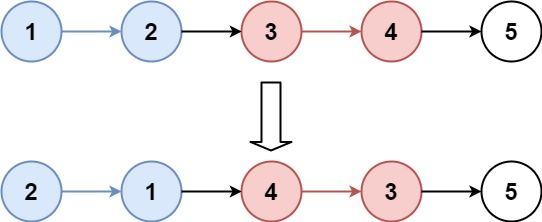
Input: head = [1,2,3,4,5], k = 2
Output: [2,1,4,3,5]

Example 2:
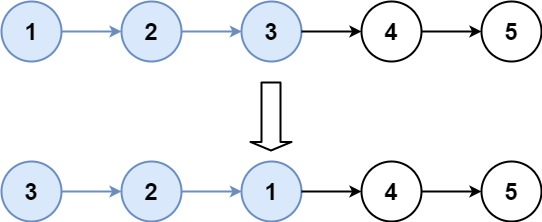
Input: head = [1,2,3,4,5], k = 3
Output: [3,2,1,4,5]

Constraints:

The number of nodes in the list is n.
1 <= k <= n <= 5000
0 <= Node.val <= 1000
 

Follow-up: Can you solve the problem in O(1) extra memory space?

In [ ]:
# time = O(n), space = O(1)
class Solution:
    
    def reverseLinkedList(self, head, k):
        
        # Reverse k nodes of the given linked list.
        # This function assumes that the list contains 
        # atleast k nodes.
        new_head, ptr = None, head
        while k:
            
            # Keep track of the next node to process in the
            # original list
            next_node = ptr.next
            
            # Insert the node pointed to by "ptr"
            # at the beginning of the reversed list
            ptr.next = new_head
            new_head = ptr
            
            # Move on to the next node
            ptr = next_node
            
            # Decrement the count of nodes to be reversed by 1
            k -= 1
        
        # Return the head of the reversed list
        return new_head
                
    
    def reverseKGroup(self, head: ListNode, k: int) -> ListNode:
        
        ptr = head
        ktail = None
        
        # Head of the final, moified linked list
        new_head = None
        
        # Keep going until there are nodes in the list
        while ptr:
            count = 0
            
            # Start counting nodes from the head
            ptr = head
            
            # Find the head of the next k nodes
            while count < k and ptr:
                ptr = ptr.next
                count += 1

            # If we counted k nodes, reverse them        
            if count == k:
                
                # Reverse k nodes and get the new head
                revHead = self.reverseLinkedList(head, k)
                
                # new_head is the head of the final linked list
                if not new_head:
                    new_head = revHead
                
                # ktail is the tail of the previous block of 
                # reversed k nodes
                if ktail:
                    ktail.next = revHead
                    
                ktail = head 
                head = ptr
        
        # attach the final, possibly un-reversed portion
        if ktail:
            ktail.next = head
        
        return new_head if new_head else head

## 206. Reverse Linked List
Given the head of a singly linked list, reverse the list, and return the reversed list.

Example 1:
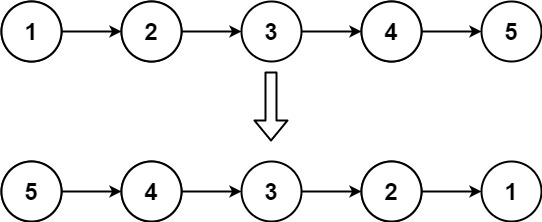
Input: head = [1,2,3,4,5]
Output: [5,4,3,2,1]

Example 2:
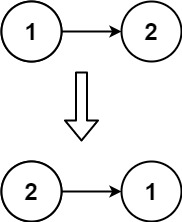
Input: head = [1,2]
Output: [2,1]

Example 3:

Input: head = []
Output: []

Constraints:

The number of nodes in the list is the range [0, 5000].
-5000 <= Node.val <= 5000

Follow up: A linked list can be reversed either iteratively or recursively. Could you implement both?

In [ ]:
# time = O(n), space = O(1)
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        prev = None
        curr = head
        while curr:
            next_temp = curr.next
            curr.next = prev
            prev = curr
            curr = next_temp
            
        return prev

# Trees and Graphs

## 101. Symmetric Tree
Given the root of a binary tree, check whether it is a mirror of itself (i.e., symmetric around its center).

Example 1:
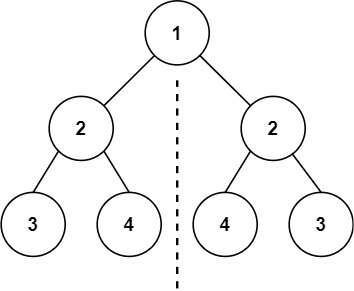
Input: root = [1,2,2,3,4,4,3]
Output: true

Example 2:
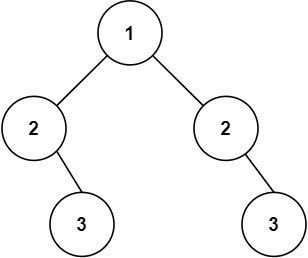
Input: root = [1,2,2,null,3,null,3]
Output: false

Constraints:

The number of nodes in the tree is in the range [1, 1000].
-100 <= Node.val <= 100

Follow up: Could you solve it both recursively and iteratively?

In [ ]:
# Java recursive
# time = space = O(n)
public boolean isSymmetric(TreeNode root) {
    return isMirror(root, root);
}

public boolean isMirror(TreeNode t1, TreeNode t2) {
    if (t1 == null && t2 == null) return true;
    if (t1 == null || t2 == null) return false;
    return (t1.val == t2.val)
        && isMirror(t1.right, t2.left)
        && isMirror(t1.left, t2.right);
}

In [ ]:
# Java iterative
# time = space = O(n)
public boolean isSymmetric(TreeNode root) {
    Queue<TreeNode> q = new LinkedList<>();
    q.add(root);
    q.add(root);
    while (!q.isEmpty()) {
        TreeNode t1 = q.poll();
        TreeNode t2 = q.poll();
        if (t1 == null && t2 == null) continue;
        if (t1 == null || t2 == null) return false;
        if (t1.val != t2.val) return false;
        q.add(t1.left);
        q.add(t2.right);
        q.add(t1.right);
        q.add(t2.left);
    }
    return true;
}

## 102. Binary Tree Level Order Traversal
Given the root of a binary tree, return the level order traversal of its nodes' values. (i.e., from left to right, level by level).

Example 1:
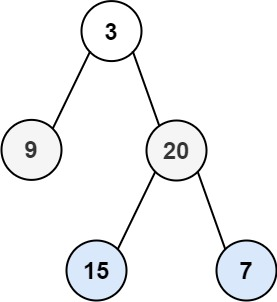
Input: root = [3,9,20,null,null,15,7]
Output: [[3],[9,20],[15,7]]

Example 2:

Input: root = [1]
Output: [[1]]

Example 3:

Input: root = []
Output: []

Constraints:

The number of nodes in the tree is in the range [0, 2000].
-1000 <= Node.val <= 1000

In [ ]:
# recursive, time = space = O(n)
class Solution:
    def levelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        levels = []
        if not root:
            return levels
        
        def helper(node, level):
            # start the current level
            if len(levels) == level:
                levels.append([])

            # append the current node value
            levels[level].append(node.val)

            # process child nodes for the next level
            if node.left:
                helper(node.left, level + 1)
            if node.right:
                helper(node.right, level + 1)
            
        helper(root, 0)
        return levels

In [ ]:
# iterative, time = space = O(n)
from collections import deque
class Solution:
    def levelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        levels = []
        if not root:
            return levels
        
        level = 0
        queue = deque([root,])
        while queue:
            # start the current level
            levels.append([])
            # number of elements in the current level 
            level_length = len(queue)
            
            for i in range(level_length):
                node = queue.popleft()
                # fulfill the current level
                levels[level].append(node.val)
                
                # add child nodes of the current level
                # in the queue for the next level
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            
            # go to next level
            level += 1
        
        return levels

## 103. Binary Tree Zigzag Level Order Traversal (Editor's choice: frequently asked by Amazon)
Given the root of a binary tree, return the zigzag level order traversal of its nodes' values. (i.e., from left to right, then right to left for the next level and alternate between).

Example 1:
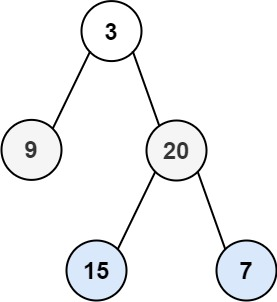
Input: root = [3,9,20,null,null,15,7]
Output: [[3],[20,9],[15,7]]

Example 2:

Input: root = [1]
Output: [[1]]

Example 3:

Input: root = []
Output: []

Constraints:

The number of nodes in the tree is in the range [0, 2000].
-100 <= Node.val <= 100

### Approaches

#### 1. BFS

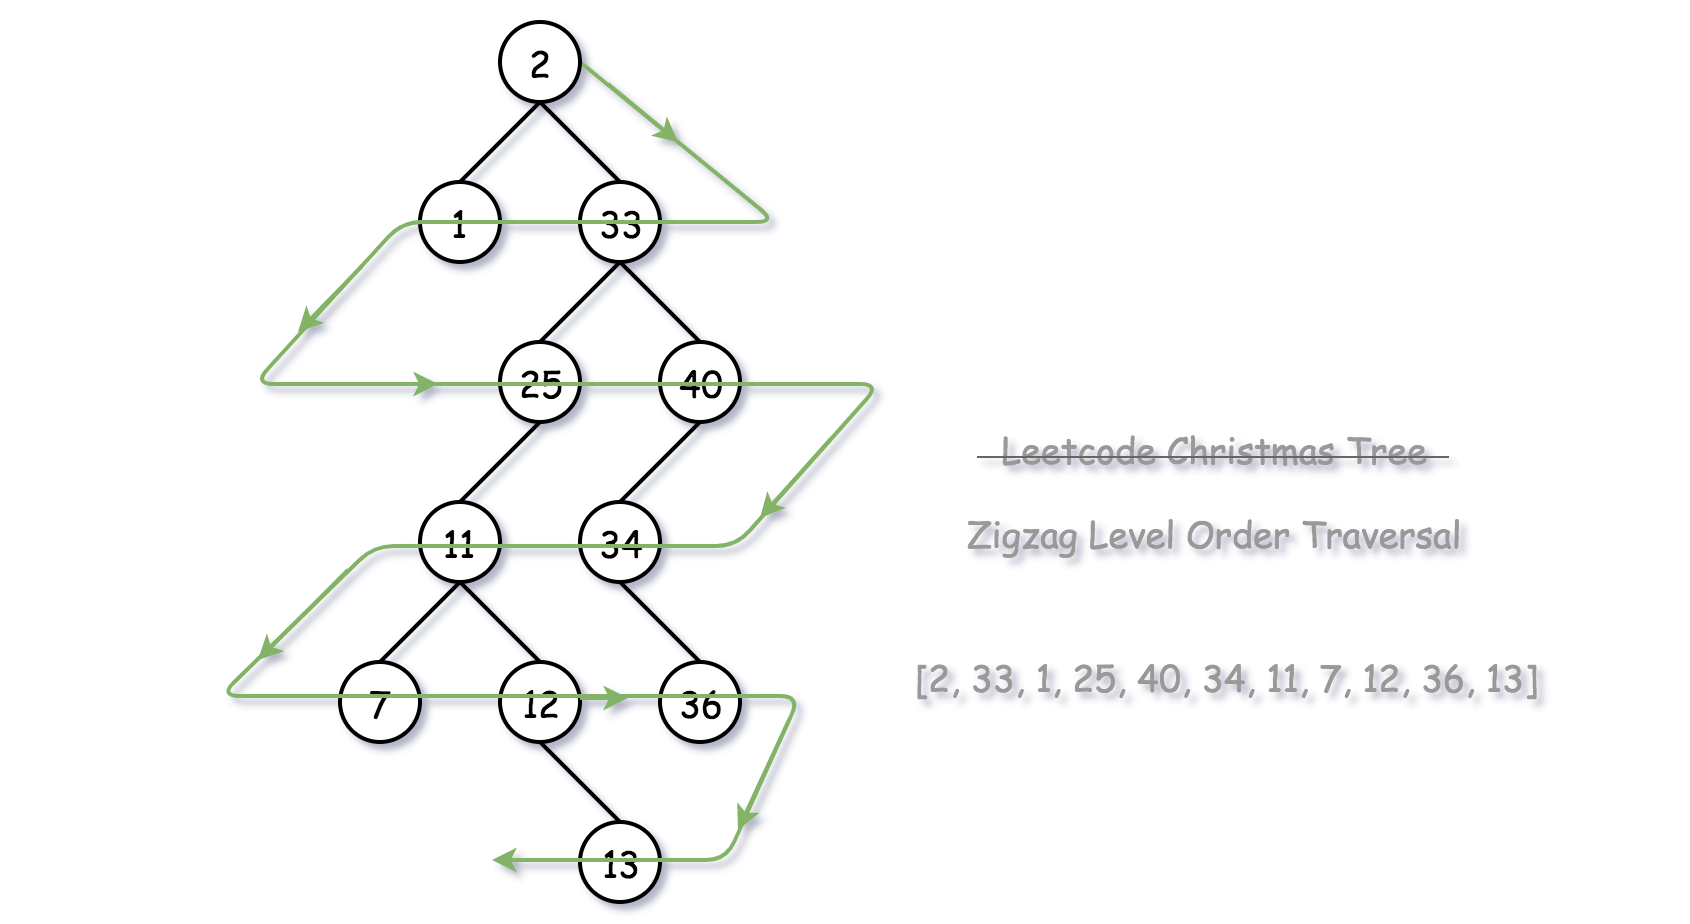

#### 2. DFS

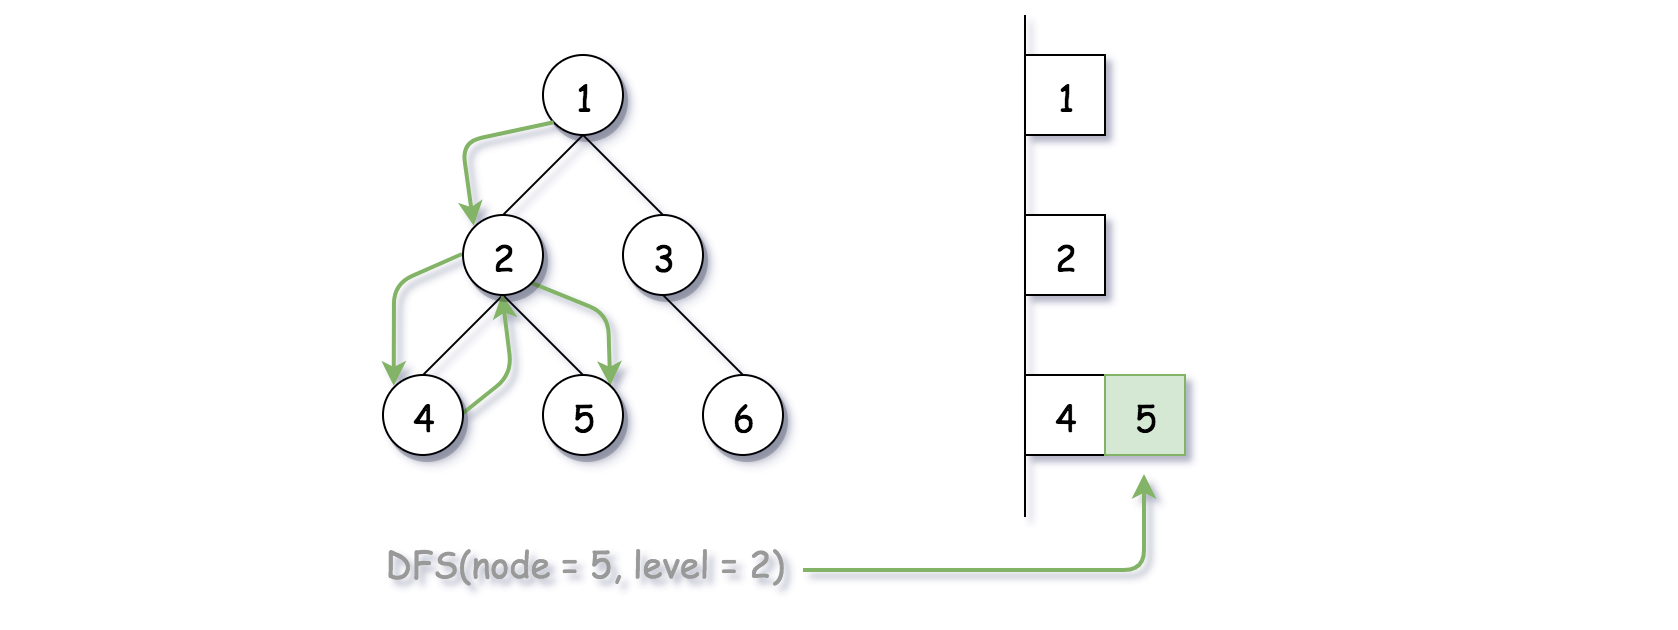

In [ ]:
# BFS, time = space = O(n)
# Definition for a binary tree node
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
from collections import deque

class Solution:
    def zigzagLevelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        ret = []
        level_list = deque()
        if root is None:
            return []
        # start with the level 0 with a delimiter
        node_queue = deque([root, None])
        is_order_left = True

        while len(node_queue) > 0:
            curr_node = node_queue.popleft()

            if curr_node:
                if is_order_left:
                    level_list.append(curr_node.val)
                else:
                    level_list.appendleft(curr_node.val)

                if curr_node.left:
                    node_queue.append(curr_node.left)
                if curr_node.right:
                    node_queue.append(curr_node.right)
            else:
                # we finish one level
                ret.append(level_list)
                # add a delimiter to mark the level
                if len(node_queue) > 0:
                    node_queue.append(None)

                # prepare for the next level
                level_list = deque()
                is_order_left = not is_order_left

        return ret

In [ ]:
# DFS, time = space = O(n)
# Definition for a binary tree node
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None
from collections import deque

class Solution:
    def zigzagLevelOrder(self, root):
        """
        :type root: TreeNode
        :rtype: List[List[int]]
        """
        if root is None:
            return []

        results = []
        def dfs(node, level):
            if level >= len(results):
                results.append(deque([node.val]))
            else:
                if level % 2 == 0:
                    results[level].append(node.val)
                else:
                    results[level].appendleft(node.val)

            for next_node in [node.left, node.right]:
                if next_node is not None:
                    dfs(next_node, level+1)

        # normal level order traversal with DFS
        dfs(root, 0)

        return results

## 126. Word Ladder II
A transformation sequence from word beginWord to word endWord using a dictionary wordList is a sequence of words beginWord -> s1 -> s2 -> ... -> sk such that:

Every adjacent pair of words differs by a single letter.
Every si for 1 <= i <= k is in wordList. Note that beginWord does not need to be in wordList.
sk == endWord
Given two words, beginWord and endWord, and a dictionary wordList, return all the shortest transformation sequences from beginWord to endWord, or an empty list if no such sequence exists. Each sequence should be returned as a list of the words [beginWord, s1, s2, ..., sk].

Example 1:
Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log","cog"]
Output: [["hit","hot","dot","dog","cog"],["hit","hot","lot","log","cog"]]
Explanation: There are 2 shortest transformation sequences:
"hit" -> "hot" -> "dot" -> "dog" -> "cog"
"hit" -> "hot" -> "lot" -> "log" -> "cog"

Example 2:
Input: beginWord = "hit", endWord = "cog", wordList = ["hot","dot","dog","lot","log"]
Output: []
Explanation: The endWord "cog" is not in wordList, therefore there is no valid transformation sequence.

Constraints:

1 <= beginWord.length <= 5
endWord.length == beginWord.length
1 <= wordList.length <= 500
wordList[i].length == beginWord.length
beginWord, endWord, and wordList[i] consist of lowercase English letters.
beginWord != endWord
All the words in wordList are unique.
The sum of all shortest transformation sequences does not exceed 105

In [ ]:
# Java, time = O(NK^2+a) where N = # words in wordList, K = max len of word, a = # possible paths
# from beginWord to endWord in the directed graph; space = O(NK)
class Solution {
    Map<String, List<String>> adjList = new HashMap<String, List<String>>();
    List<String> currPath = new ArrayList<String>();
    List<List<String>> shortestPaths = new ArrayList<List<String>>();
    
    private List<String> findNeighbors(String word, Set<String> wordList) {
        List<String> neighbors = new ArrayList<String>();
        char charList[] = word.toCharArray();
        
        for (int i = 0; i < word.length(); i++) {
            char oldChar = charList[i];   
            
            // replace the i-th character with all letters from a to z except the original character
            for (char c = 'a'; c <= 'z'; c++) {
                charList[i] = c;
                
                // skip if the character is same as original or if the word is not present in the wordList
                if (c == oldChar || !wordList.contains(String.valueOf(charList))) {
                    continue;
                }
                neighbors.add(String.valueOf(charList));
            }
            charList[i] = oldChar;
        }
        return neighbors;
    }
    
    private void backtrack(String source, String destination) {
        // store the path if we reached the endWord
        if (source.equals(destination)) {
            List<String> tempPath = new ArrayList<String>(currPath);
            Collections.reverse(tempPath);
            shortestPaths.add(tempPath);
        }
        
        if (!adjList.containsKey(source)) {
            return;
        }
        
        for (int i = 0; i < adjList.get(source).size(); i++) {
            currPath.add(adjList.get(source).get(i));
            backtrack(adjList.get(source).get(i), destination);
            currPath.remove(currPath.size() - 1);
        }
    }
    
    private void bfs(String beginWord, String endWord, Set<String> wordList) {
        Queue<String> q = new LinkedList<>();
        q.add(beginWord);
        
        // remove the root word which is the first layer in the BFS
        if (wordList.contains(beginWord)) {
            wordList.remove(beginWord);
        }
        
        Map<String, Integer> isEnqueued = new HashMap<String, Integer>();
        isEnqueued.put(beginWord, 1);
        
        while (q.size() > 0)  {
             // visited will store the words of current layer
            List<String> visited = new ArrayList<String>();
            
            for (int i = q.size() - 1; i >= 0; i--) {
                String currWord = q.peek(); 
                q.remove();

                // findNeighbors will have the adjacent words of the currWord
                List<String> neighbors = findNeighbors(currWord, wordList);
                for (String word : neighbors) {
                    visited.add(word);
                    
                    if (!adjList.containsKey(word)) {
                        adjList.put(word, new ArrayList<String>());
                    }
                    
                    // add the edge from word to currWord in the list
                    adjList.get(word).add(currWord);
                    if (!isEnqueued.containsKey(word)) {
                        q.add(word);
                        isEnqueued.put(word, 1);
                    }
                }
            }
             // removing the words of the previous layer
            for (int i = 0; i < visited.size(); i++) {
                if (wordList.contains(visited.get(i))) {
                    wordList.remove(visited.get(i));
                }
            }
        }
    }
    
    public List<List<String>> findLadders(String beginWord, String endWord, List<String> wordList) {
        // copying the words into the set for efficient deletion in BFS
        Set<String> copiedWordList = new HashSet<>(wordList);
        // build the DAG using BFS
        bfs(beginWord, endWord, copiedWordList);
        
        // every path will start from the endWord
        currPath.add(endWord);
        // traverse the DAG to find all the paths between endWord and beginWord
        backtrack(endWord, beginWord);
        
        return shortestPaths;
    }
}

## 207. Course Schedule
There are a total of numCourses courses you have to take, labeled from 0 to numCourses - 1. You are given an array prerequisites where prerequisites[i] = [ai, bi] indicates that you must take course bi first if you want to take course ai.

For example, the pair [0, 1], indicates that to take course 0 you have to first take course 1.
Return true if you can finish all courses. Otherwise, return false.

Example 1:
Input: numCourses = 2, prerequisites = [[1,0]]
Output: true
Explanation: There are a total of 2 courses to take. 
To take course 1 you should have finished course 0. So it is possible.

Example 2:
Input: numCourses = 2, prerequisites = [[1,0],[0,1]]
Output: false
Explanation: There are a total of 2 courses to take. 
To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.

Constraints:

1 <= numCourses <= 2000
0 <= prerequisites.length <= 5000
prerequisites[i].length == 2
0 <= ai, bi < numCourses
All the pairs prerequisites[i] are unique.

In [ ]:
# Postorder DFS, time = space = O(∣E∣+∣V∣)
class Solution(object):
    def canFinish(self, numCourses, prerequisites):
        """
        :type numCourses: int
        :type prerequisites: List[List[int]]
        :rtype: bool
        """
        from collections import defaultdict
        courseDict = defaultdict(list)

        for relation in prerequisites:
            nextCourse, prevCourse = relation[0], relation[1]
            courseDict[prevCourse].append(nextCourse)

        checked = [False] * numCourses
        path = [False] * numCourses

        for currCourse in range(numCourses):
            if self.isCyclic(currCourse, courseDict, checked, path):
                return False
        return True


    def isCyclic(self, currCourse, courseDict, checked, path):
        """   """
        # 1). bottom-cases
        if checked[currCourse]:
            # this node has been checked, no cycle would be formed with this node.
            return False
        if path[currCourse]:
            # came across a marked node in the path, cyclic !
            return True

        # 2). postorder DFS on the children nodes
        # mark the node in the path
        path[currCourse] = True

        ret = False
        # postorder DFS, to visit all its children first.
        for child in courseDict[currCourse]:
            ret = self.isCyclic(child, courseDict, checked, path)
            if ret: break

        # 3). after the visits of children, we come back to process the node itself
        # remove the node from the path
        path[currCourse] = False

        # Now that we've visited the nodes in the downstream,
        #   we complete the check of this node.
        checked[currCourse] = True
        return ret

In [ ]:
# toposort, time = space = O(∣E∣+∣V∣)
class GNode(object):
    """  data structure represent a vertex in the graph."""
    def __init__(self):
        self.inDegrees = 0
        self.outNodes = []

class Solution(object):
    def canFinish(self, numCourses, prerequisites):
        """
        :type numCourses: int
        :type prerequisites: List[List[int]]
        :rtype: bool
        """
        from collections import defaultdict, deque
        # key: index of node; value: GNode
        graph = defaultdict(GNode)

        totalDeps = 0
        for relation in prerequisites:
            nextCourse, prevCourse = relation[0], relation[1]
            graph[prevCourse].outNodes.append(nextCourse)
            graph[nextCourse].inDegrees += 1
            totalDeps += 1

        # we start from courses that have no prerequisites.
        # we could use either set, stack or queue to keep track of courses with no dependence.
        nodepCourses = deque()
        for index, node in graph.items():
            if node.inDegrees == 0:
                nodepCourses.append(index)

        removedEdges = 0
        while nodepCourses:
            # pop out course without dependency
            course = nodepCourses.pop()

            # remove its outgoing edges one by one
            for nextCourse in graph[course].outNodes:
                graph[nextCourse].inDegrees -= 1
                removedEdges += 1
                # while removing edges, we might discover new courses with prerequisites removed, i.e. new courses without prerequisites.
                if graph[nextCourse].inDegrees == 0:
                    nodepCourses.append(nextCourse)

        if removedEdges == totalDeps:
            return True
        else:
            # if there are still some edges left, then there exist some cycles
            # Due to the dead-lock (dependencies), we cannot remove the cyclic edges
            return False

## 675. Cut Off Trees for Golf Event
You are asked to cut off all the trees in a forest for a golf event. The forest is represented as an m x n matrix. In this matrix:

0 means the cell cannot be walked through.
1 represents an empty cell that can be walked through.
A number greater than 1 represents a tree in a cell that can be walked through, and this number is the tree's height.
In one step, you can walk in any of the four directions: north, east, south, and west. If you are standing in a cell with a tree, you can choose whether to cut it off.

You must cut off the trees in order from shortest to tallest. When you cut off a tree, the value at its cell becomes 1 (an empty cell).

Starting from the point (0, 0), return the minimum steps you need to walk to cut off all the trees. If you cannot cut off all the trees, return -1.

Note: The input is generated such that no two trees have the same height, and there is at least one tree needs to be cut off.

Example 1:
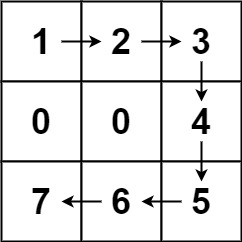
Input: forest = [[1,2,3],[0,0,4],[7,6,5]]
Output: 6
Explanation: Following the path above allows you to cut off the trees from shortest to tallest in 6 steps.

Example 2:
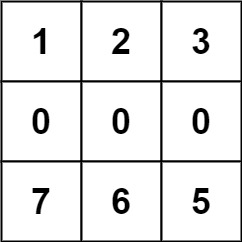
Input: forest = [[1,2,3],[0,0,0],[7,6,5]]
Output: -1
Explanation: The trees in the bottom row cannot be accessed as the middle row is blocked.

Example 3:

Input: forest = [[2,3,4],[0,0,5],[8,7,6]]
Output: 6
Explanation: You can follow the same path as Example 1 to cut off all the trees.
Note that you can cut off the first tree at (0, 0) before making any steps.

Constraints:

m == forest.length
n == forest[i].length
1 <= m, n <= 50
0 <= forest[i][j] <= 109
Heights of all trees are distinct

__Complexity for all solutions: time = O((RC)^2)) where there are R rows and C columns in forest; space = O(RC)__

In [ ]:
# We frame the problem as providing some distance function dist(forest, sr, sc, tr, tc) that calculates
# the path distance from source (sr, sc) to target (tr, tc) through obstacles dist[i][j] == 0.
# (This distance function will return -1 if the path is impossible.)
class Solution(object):
    def cutOffTree(self, forest):
        trees = sorted((v, r, c) for r, row in enumerate(forest)
                       for c, v in enumerate(row) if v > 1)
        sr = sc = ans = 0
        for _, tr, tc in trees:
            d = dist(forest, sr, sc, tr, tc)
            if d < 0: return -1
            ans += d
            sr, sc = tr, tc
        return ans
    
    
# dist f(x) BFS
def bfs(forest, sr, sc, tr, tc):
    R, C = len(forest), len(forest[0])
    queue = collections.deque([(sr, sc, 0)])
    seen = {(sr, sc)}
    while queue:
        r, c, d = queue.popleft()
        if r == tr and c == tc:
            return d
        for nr, nc in ((r-1, c), (r+1, c), (r, c-1), (r, c+1)):
            if (0 <= nr < R and 0 <= nc < C and
                    (nr, nc) not in seen and forest[nr][nc]):
                seen.add((nr, nc))
                queue.append((nr, nc, d+1))
    return -1


# dist f(X) A* Search
def astar(forest, sr, sc, tr, tc):
    R, C = len(forest), len(forest[0])
    heap = [(0, 0, sr, sc)]
    cost = {(sr, sc): 0}
    while heap:
        f, g, r, c = heapq.heappop(heap)
        if r == tr and c == tc: return g
        for nr, nc in ((r-1,c), (r+1,c), (r,c-1), (r,c+1)):
            if 0 <= nr < R and 0 <= nc < C and forest[nr][nc]:
                ncost = g + 1 + abs(nr - tr) + abs(nc - tc)
                if ncost < cost.get((nr, nc), 9999):
                    cost[nr, nc] = ncost
                    heapq.heappush(heap, (ncost, g+1, nr, nc))
    return -1


## 733. Flood Fill
An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image[sr][sc].

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.

Return the modified image after performing the flood fill.

Example 1:
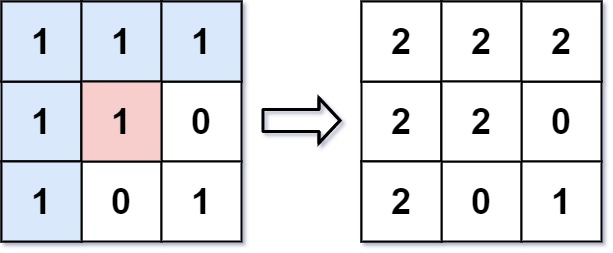
Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, color = 2
Output: [[2,2,2],[2,2,0],[2,0,1]]
Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.

Example 2:

Input: image = [[0,0,0],[0,0,0]], sr = 0, sc = 0, color = 0
Output: [[0,0,0],[0,0,0]]
Explanation: The starting pixel is already colored 0, so no changes are made to the image.

Constraints:

m == image.length
n == image[i].length
1 <= m, n <= 50
0 <= image[i][j], color < 216
0 <= sr < m
0 <= sc < n

In [ ]:
# DFS, time = space = O(n)
class Solution(object):
    def floodFill(self, image, sr, sc, newColor):
        R, C = len(image), len(image[0])
        color = image[sr][sc]
        if color == newColor: return image
        def dfs(r, c):
            if image[r][c] == color:
                image[r][c] = newColor
                if r >= 1: dfs(r-1, c)
                if r+1 < R: dfs(r+1, c)
                if c >= 1: dfs(r, c-1)
                if c+1 < C: dfs(r, c+1)

        dfs(sr, sc)
        return image

# Recursion
Only one here; see the rest in the list of questions asked by other companies (at mthe start of this notebook)

## 79. Word Search
Given an m x n grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

Example 1:
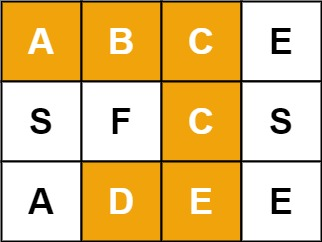
Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED"
Output: true

Example 2:
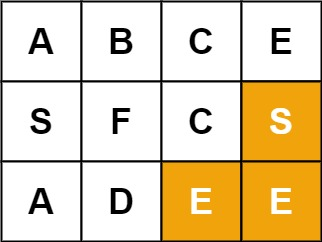
Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "SEE"
Output: true

Example 3:
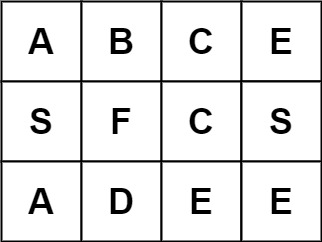
Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCB"
Output: false

Constraints:

m == board.length
n = board[i].length
1 <= m, n <= 6
1 <= word.length <= 15
board and word consists of only lowercase and uppercase English letters.

Follow up: Could you use search pruning to make your solution faster with a larger board?

In [ ]:
# time = O(N⋅3^L) where N = # cells in board and L = len of word to be matched; space = O(L)
class Solution(object):
    def exist(self, board, word):
        """
        :type board: List[List[str]]
        :type word: str
        :rtype: bool
        """
        self.ROWS = len(board)
        self.COLS = len(board[0])
        self.board = board

        for row in range(self.ROWS):
            for col in range(self.COLS):
                if self.backtrack(row, col, word):
                    return True

        # no match found after all exploration
        return False


    def backtrack(self, row, col, suffix):
        # bottom case: we find match for each letter in the word
        if len(suffix) == 0:
            return True

        # Check the current status, before jumping into backtracking
        if row < 0 or row == self.ROWS or col < 0 or col == self.COLS \
                or self.board[row][col] != suffix[0]:
            return False

        ret = False
        # mark the choice before exploring further.
        self.board[row][col] = '#'
        # explore the 4 neighbor directions
        for rowOffset, colOffset in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            ret = self.backtrack(row + rowOffset, col + colOffset, suffix[1:])
            # break instead of return directly to do some cleanup afterwards
            if ret: break

        # revert the change, a clean slate and no side-effect
        self.board[row][col] = suffix[0]

        # Tried all directions, and did not find any match
        return ret

# Sorting and Searching

## 167. Two Sum II - Input array is sorted
Given a 1-indexed array of integers numbers that is already sorted in non-decreasing order, find two numbers such that they add up to a specific target number. Let these two numbers be numbers[index1] and numbers[index2] where 1 <= index1 < index2 <= numbers.length.

Return the indices of the two numbers, index1 and index2, added by one as an integer array [index1, index2] of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only constant extra space.

Example 1:
Input: numbers = [2,7,11,15], target = 9
Output: [1,2]
Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].

Example 2:
Input: numbers = [2,3,4], target = 6
Output: [1,3]
Explanation: The sum of 2 and 4 is 6. Therefore index1 = 1, index2 = 3. We return [1, 3].

Example 3:
Input: numbers = [-1,0], target = -1
Output: [1,2]
Explanation: The sum of -1 and 0 is -1. Therefore index1 = 1, index2 = 2. We return [1, 2].

Constraints:

2 <= numbers.length <= 3 * 104
-1000 <= numbers[i] <= 1000
numbers is sorted in non-decreasing order.
-1000 <= target <= 1000
The tests are generated such that there is exactly one solution

Approach

We can apply Two Sum's solutions directly to get O(n^2) time, O(1) space using brute force and O(n) time, O(n) space using hash table. However, both existing solutions do not make use of the property that the input array is sorted. We can do better

In [ ]:
# C++, time = O(n), space = O(1)
class Solution {
public:
    vector<int> twoSum(vector<int>& numbers, int target) {
        int low = 0;
        int high = numbers.size() - 1;
        while (low < high) {
            int sum = numbers[low] + numbers[high];
                          
            if (sum == target) {
                return {low + 1, high + 1};
            } else if (sum < target) {
                ++low;
            } else {
                --high;
            }
        }
        // In case there is no solution, return {-1, -1}.
        return {-1, -1};
    }
};

## 347. Top K Frequent Elements
Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.

Example 1:
Input: nums = [1,1,1,2,2,3], k = 2
Output: [1,2]

Example 2:
Input: nums = [1], k = 1
Output: [1]

Constraints:

1 <= nums.length <= 105
-104 <= nums[i] <= 104
k is in the range [1, the number of unique elements in the array].
It is guaranteed that the answer is unique.

Follow up: Your algorithm's time complexity must be better than O(n log n), where n is the array's size

In [ ]:
# time = O(Nlogk) if k<N and O(N) if N=k; space = O(N + k)
from collections import Counter
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]: 
        # O(1) time 
        if k == len(nums):
            return nums
        
        # 1. build hash map : character and how often it appears
        # O(N) time
        count = Counter(nums)   
        # 2-3. build heap of top k frequent elements and
        # convert it into an output array
        # O(N log k) time
        return heapq.nlargest(k, count.keys(), key=count.get) 

In [ ]:
# quicksaelect
# time = O(N) average,O(N^2) worst; space = O(n)
from collections import Counter
class Solution:
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        count = Counter(nums)
        unique = list(count.keys())
        
        def partition(left, right, pivot_index) -> int:
            pivot_frequency = count[unique[pivot_index]]
            # 1. move pivot to end
            unique[pivot_index], unique[right] = unique[right], unique[pivot_index]  
            
            # 2. move all less frequent elements to the left
            store_index = left
            for i in range(left, right):
                if count[unique[i]] < pivot_frequency:
                    unique[store_index], unique[i] = unique[i], unique[store_index]
                    store_index += 1

            # 3. move pivot to its final place
            unique[right], unique[store_index] = unique[store_index], unique[right]  
            
            return store_index
        
        def quickselect(left, right, k_smallest) -> None:
            """
            Sort a list within left..right till kth less frequent element
            takes its place. 
            """
            # base case: the list contains only one element
            if left == right: 
                return
            
            # select a random pivot_index
            pivot_index = random.randint(left, right)     
                            
            # find the pivot position in a sorted list   
            pivot_index = partition(left, right, pivot_index)
            
            # if the pivot is in its final sorted position
            if k_smallest == pivot_index:
                 return 
            # go left
            elif k_smallest < pivot_index:
                quickselect(left, pivot_index - 1, k_smallest)
            # go right
            else:
                quickselect(pivot_index + 1, right, k_smallest)
         
        n = len(unique) 
        # kth top frequent element is (n - k)th less frequent.
        # Do a partial sort: from less frequent to the most frequent, till
        # (n - k)th less frequent element takes its place (n - k) in a sorted array. 
        # All element on the left are less frequent.
        # All the elements on the right are more frequent.  
        quickselect(0, n - 1, n - k)
        # Return top k frequent elements
        return unique[n - k:]

# Dynamic Programming
Amazon does not ask a whole lot of Dynamic Programming questions. We recommend Best Time to Buy and Sell Stock.  
All questions are in other companies' notebooks (see list in the beginning of this notebook)

# Design
We highly recommend LRU Cache

## 295. Find Median from Data Stream
The median is the middle value in an ordered integer list. If the size of the list is even, there is no middle value and the median is the mean of the two middle values.

For example, for arr = [2,3,4], the median is 3.
For example, for arr = [2,3], the median is (2 + 3) / 2 = 2.5.
Implement the MedianFinder class:

MedianFinder() initializes the MedianFinder object.
void addNum(int num) adds the integer num from the data stream to the data structure.
double findMedian() returns the median of all elements so far. Answers within 10-5 of the actual answer will be accepted.

Example 1:
Input
["MedianFinder", "addNum", "addNum", "findMedian", "addNum", "findMedian"]
[[], [1], [2], [], [3], []]
Output
[null, null, null, 1.5, null, 2.0]

Explanation
MedianFinder medianFinder = new MedianFinder();
medianFinder.addNum(1);    // arr = [1]
medianFinder.addNum(2);    // arr = [1, 2]
medianFinder.findMedian(); // return 1.5 (i.e., (1 + 2) / 2)
medianFinder.addNum(3);    // arr[1, 2, 3]
medianFinder.findMedian(); // return 2.0

Constraints:

-105 <= num <= 105
There will be at least one element in the data structure before calling findMedian.
At most 5 * 104 calls will be made to addNum and findMedian.

Follow up:

* If all integer numbers from the stream are in the range [0, 100], how would you optimize your solution?
* If 99% of all integer numbers from the stream are in the range [0, 100], how would you optimize your solution?

In [ ]:
# C++, multiset and two pointers
# time = O(logn), space = O(n)
class MedianFinder {
    multiset<int> data;
    multiset<int>::iterator lo_median, hi_median;

public:
    MedianFinder()
        : lo_median(data.end())
        , hi_median(data.end())
    {
    }

    void addNum(int num)
    {
        const size_t n = data.size();   // store previous size

        data.insert(num);               // insert into multiset

        if (!n) {
            // no elements before, one element now
            lo_median = hi_median = data.begin();
        }
        else if (n & 1) {
            // odd size before (i.e. lo == hi), even size now (i.e. hi = lo + 1)

            if (num < *lo_median)       // num < lo
                lo_median--;
            else                        // num >= hi
                hi_median++;            // insertion at end of equal range
        }
        else {
            // even size before (i.e. hi = lo + 1), odd size now (i.e. lo == hi)

            if (num > *lo_median && num < *hi_median) {
                lo_median++;                    // num in between lo and hi
                hi_median--;
            }
            else if (num >= *hi_median)         // num inserted after hi
                lo_median++;
            else                                // num <= lo < hi
                lo_median = --hi_median;        // insertion at end of equal range spoils lo
        }
    }

    double findMedian()
    {
        return ((double) *lo_median + *hi_median) * 0.5;
    }
};

In [ ]:
# C++, one pointer (shorter, but harder to understand)
# time = O(logn), space = O(n)
class MedianFinder {
    multiset<int> data;
    multiset<int>::iterator mid;

public:
    MedianFinder()
        : mid(data.end())
    {
    }

    void addNum(int num)
    {
        const int n = data.size();
        data.insert(num);

        if (!n)                                 // first element inserted
            mid = data.begin();
        else if (num < *mid)                    // median is decreased
            mid = (n & 1 ? mid : prev(mid));
        else                                    // median is increased
            mid = (n & 1 ? next(mid) : mid);
    }

    double findMedian()
    {
        const int n = data.size();
        return ((double) *mid + *next(mid, n % 2 - 1)) * 0.5;
    }
};

In [ ]:
# C++, 2 heaps
# time = O(logn), space = O(n)
class MedianFinder {
    priority_queue<int> lo;                              // max heap
    priority_queue<int, vector<int>, greater<int>> hi;   // min heap

public:
    // Adds a number into the data structure.
    void addNum(int num)
    {
        lo.push(num);                                    // Add to max heap

        hi.push(lo.top());                               // balancing step
        lo.pop();

        if (lo.size() < hi.size()) {                     // maintain size property
            lo.push(hi.top());
            hi.pop();
        }
    }

    // Returns the median of current data stream
    double findMedian()
    {
        return lo.size() > hi.size() ? lo.top() : ((double) lo.top() + hi.top()) * 0.5;
    }
};

In [ ]:
# C++, insertion sort! (SIMPLEST)
# time = O(n), space = O(n)
class MedianFinder {
    vector<int> store; // resize-able container

public:
    // Adds a number into the data structure.
    void addNum(int num)
    {
        if (store.empty())
            store.push_back(num);
        else
            store.insert(lower_bound(store.begin(), store.end(), num), num);     // binary search and insertion combined
    }

    // Returns the median of current data stream
    double findMedian()
    {
        int n = store.size();
        return n & 1 ? store[n / 2] : ((double) store[n / 2 - 1] + store[n / 2]) * 0.5;
    }
};

## 348. Design Tic-Tac-Toe
Assume the following rules are for the tic-tac-toe game on an n x n board between two players:

A move is guaranteed to be valid and is placed on an empty block.
Once a winning condition is reached, no more moves are allowed.
A player who succeeds in placing n of their marks in a horizontal, vertical, or diagonal row wins the game.
Implement the TicTacToe class:

TicTacToe(int n) Initializes the object the size of the board n.
int move(int row, int col, int player) Indicates that the player with id player plays at the cell (row, col) of the board. The move is guaranteed to be a valid move, and the two players alternate in making moves. Return
0 if there is no winner after the move,
1 if player 1 is the winner after the move, or
2 if player 2 is the winner after the move.
 

Example 1:

Input
["TicTacToe", "move", "move", "move", "move", "move", "move", "move"]
[[3], [0, 0, 1], [0, 2, 2], [2, 2, 1], [1, 1, 2], [2, 0, 1], [1, 0, 2], [2, 1, 1]]
Output
[null, 0, 0, 0, 0, 0, 0, 1]

Explanation
TicTacToe ticTacToe = new TicTacToe(3);
Assume that player 1 is "X" and player 2 is "O" in the board.
ticTacToe.move(0, 0, 1); // return 0 (no one wins)
```
|X| | |
| | | |    // Player 1 makes a move at (0, 0).
| | | |

ticTacToe.move(0, 2, 2); // return 0 (no one wins)
|X| |O|
| | | |    // Player 2 makes a move at (0, 2).
| | | |

ticTacToe.move(2, 2, 1); // return 0 (no one wins)
|X| |O|
| | | |    // Player 1 makes a move at (2, 2).
| | |X|

ticTacToe.move(1, 1, 2); // return 0 (no one wins)
|X| |O|
| |O| |    // Player 2 makes a move at (1, 1).
| | |X|

ticTacToe.move(2, 0, 1); // return 0 (no one wins)
|X| |O|
| |O| |    // Player 1 makes a move at (2, 0).
|X| |X|

ticTacToe.move(1, 0, 2); // return 0 (no one wins)
|X| |O|
|O|O| |    // Player 2 makes a move at (1, 0).
|X| |X|

ticTacToe.move(2, 1, 1); // return 1 (player 1 wins)
|X| |O|
|O|O| |    // Player 1 makes a move at (2, 1).
|X|X|X|
``` 

Constraints:

2 <= n <= 100
player is 1 or 2.
0 <= row, col < n
(row, col) are unique for each different call to move.
At most n2 calls will be made to move.
 

Follow-up: Could you do better than O(n2) per move() operation?

   Hint #1  
Could you trade extra space such that move() operation can be done in O(1)?

   Hint #2  
You need two arrays: int rows[n], int cols[n], plus two variables: diagonal, anti_diagonal.

In [ ]:
# Java, optimized approach
# time = O(1), space = O(n)
public class TicTacToe {
    int[] rows;
    int[] cols;
    int diagonal;
    int antiDiagonal;

    public TicTacToe(int n) {
        rows = new int[n];
        cols = new int[n];
    }

    public int move(int row, int col, int player) {
        int currentPlayer = (player == 1) ? 1 : -1;
        // update currentPlayer in rows and cols arrays
        rows[row] += currentPlayer;
        cols[col] += currentPlayer;
        // update diagonal
        if (row == col) {
            diagonal += currentPlayer;
        }
        //update anti diagonal
        if (col == (cols.length - row - 1)) {
            antiDiagonal += currentPlayer;
        }
        int n = rows.length;
        // check if the current player wins
        if (Math.abs(rows[row]) == n ||
                Math.abs(cols[col]) == n ||
                Math.abs(diagonal) == n ||
                Math.abs(antiDiagonal) == n) {
            return player;
        }
        // No one wins
        return 0;
    }
}

## 895. Maximum Frequency Stack
Design a stack-like data structure to push elements to the stack and pop the most frequent element from the stack.

Implement the FreqStack class:

FreqStack() constructs an empty frequency stack.
void push(int val) pushes an integer val onto the top of the stack.
int pop() removes and returns the most frequent element in the stack.
If there is a tie for the most frequent element, the element closest to the stack's top is removed and returned.

Example 1:
Input
["FreqStack", "push", "push", "push", "push", "push", "push", "pop", "pop", "pop", "pop"]
[[], [5], [7], [5], [7], [4], [5], [], [], [], []]
Output
[null, null, null, null, null, null, null, 5, 7, 5, 4]

Explanation
FreqStack freqStack = new FreqStack();
freqStack.push(5); // The stack is [5]
freqStack.push(7); // The stack is [5,7]
freqStack.push(5); // The stack is [5,7,5]
freqStack.push(7); // The stack is [5,7,5,7]
freqStack.push(4); // The stack is [5,7,5,7,4]
freqStack.push(5); // The stack is [5,7,5,7,4,5]
freqStack.pop();   // return 5, as 5 is the most frequent. The stack becomes [5,7,5,7,4].
freqStack.pop();   // return 7, as 5 and 7 is the most frequent, but 7 is closest to the top. The stack becomes [5,7,5,4].
freqStack.pop();   // return 5, as 5 is the most frequent. The stack becomes [5,7,4].
freqStack.pop();   // return 4, as 4, 5 and 7 is the most frequent, but 4 is closest to the top. The stack becomes [5,7].

Constraints:

0 <= val <= 109
At most 2 * 104 calls will be made to push and pop.
It is guaranteed that there will be at least one element in the stack before calling pop

In [ ]:
# stack of stacks
# time = O(1), space = O(n)
class FreqStack(object):

    def __init__(self):
        self.freq = collections.Counter()
        self.group = collections.defaultdict(list)
        self.maxfreq = 0

    def push(self, x):
        f = self.freq[x] + 1
        self.freq[x] = f
        if f > self.maxfreq:
            self.maxfreq = f
        self.group[f].append(x)

    def pop(self):
        x = self.group[self.maxfreq].pop()
        self.freq[x] -= 1
        if not self.group[self.maxfreq]:
            self.maxfreq -= 1

        return x

# Others
We recommend Prison Cells After N Days

## 763. Partition Labels
You are given a string s. We want to partition the string into as many parts as possible so that each letter appears in at most one part.

Note that the partition is done so that after concatenating all the parts in order, the resultant string should be s.

Return a list of integers representing the size of these parts.

Example 1:
Input: s = "ababcbacadefegdehijhklij"
Output: [9,7,8]
Explanation:
The partition is "ababcbaca", "defegde", "hijhklij".
This is a partition so that each letter appears in at most one part.
A partition like "ababcbacadefegde", "hijhklij" is incorrect, because it splits s into less parts.

Example 2:
Input: s = "eccbbbbdec"
Output: [10]

Constraints:

1 <= s.length <= 500
s consists of lowercase English letters

Hint #1  
Try to greedily choose the smallest partition that includes the first letter. If you have something like "abaccbdeffed", then you might need to add b. You can use an map like "last['b'] = 5" to help you expand the width of your partition.

In [ ]:
# greedy approach
# time = O(n), space = O(1)
class Solution(object):
    def partitionLabels(self, S):
        last = {c: i for i, c in enumerate(S)}
        j = anchor = 0
        ans = []
        for i, c in enumerate(S):
            j = max(j, last[c])
            if i == j:
                ans.append(i - anchor + 1)
                anchor = i + 1
            
        return ans

## 957. Prison Cells After N Days
There are 8 prison cells in a row and each cell is either occupied or vacant.

Each day, whether the cell is occupied or vacant changes according to the following rules:

If a cell has two adjacent neighbors that are both occupied or both vacant, then the cell becomes occupied.
Otherwise, it becomes vacant.
Note that because the prison is a row, the first and the last cells in the row can't have two adjacent neighbors.

You are given an integer array cells where cells[i] == 1 if the ith cell is occupied and cells[i] == 0 if the ith cell is vacant, and you are given an integer n.

Return the state of the prison after n days (i.e., n such changes described above).

Example 1:
Input: cells = [0,1,0,1,1,0,0,1], n = 7
Output: [0,0,1,1,0,0,0,0]
Explanation: The following table summarizes the state of the prison on each day:
```
Day 0: [0, 1, 0, 1, 1, 0, 0, 1]
Day 1: [0, 1, 1, 0, 0, 0, 0, 0]
Day 2: [0, 0, 0, 0, 1, 1, 1, 0]
Day 3: [0, 1, 1, 0, 0, 1, 0, 0]
Day 4: [0, 0, 0, 0, 0, 1, 0, 0]
Day 5: [0, 1, 1, 1, 0, 1, 0, 0]
Day 6: [0, 0, 1, 0, 1, 1, 0, 0]
Day 7: [0, 0, 1, 1, 0, 0, 0, 0]
```
Example 2:
Input: cells = [1,0,0,1,0,0,1,0], n = 1000000000
Output: [0,0,1,1,1,1,1,0]

Constraints:

cells.length == 8
cells[i] is either 0 or 1.
1 <= n <= 10^9

In [ ]:
# Simulation with Fast Forwarding
# time = O(K⋅min(N,2^K)) where N=# steps and K=# cells , space = O(K*2^K)
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:

        seen = dict()
        is_fast_forwarded = False

        while N > 0:
            # we only need to run the fast-forward once at most
            if not is_fast_forwarded:
                state_key = tuple(cells)
                if state_key in seen:
                    # the length of the cycle is seen[state_key] - N 
                    N %= seen[state_key] - N
                    is_fast_forwarded = True
                else:
                    seen[state_key] = N

            # check if there is still some steps remained,
            # with or without the fast-forwarding.
            if N > 0:
                N -= 1
                next_day_cells = self.nextDay(cells)
                cells = next_day_cells

        return cells


    def nextDay(self, cells: List[int]):
        ret = [0]      # head
        for i in range(1, len(cells)-1):
            ret.append(int(cells[i-1] == cells[i+1]))
        ret.append(0)  # tail
        return ret

In [ ]:
 # Simulation with Bitmap
# time = O(min(N,2^K)) where N=# steps and K=# cells , space = O(2^K)
class Solution:
    def prisonAfterNDays(self, cells: List[int], N: int) -> List[int]:

        seen = dict()
        is_fast_forwarded = False

        # step 1). convert the cells to bitmap
        state_bitmap = 0x0
        for cell in cells:
            state_bitmap <<= 1
            state_bitmap = (state_bitmap | cell)

        # step 2). run the simulation with hashmap
        while N > 0:
            if not is_fast_forwarded:
                if state_bitmap in seen:
                    # the length of the cycle is seen[state_key] - N 
                    N %= seen[state_bitmap] - N
                    is_fast_forwarded = True
                else:
                    seen[state_bitmap] = N
            # if there is still some steps remained,
            #   with or without the fast-forwarding.
            if N > 0:
                N -= 1
                state_bitmap = self.nextDay(state_bitmap)

        # step 3). convert the bitmap back to the state cells
        ret = []
        for i in range(len(cells)):
            ret.append(state_bitmap & 0x1)
            state_bitmap = state_bitmap >> 1

        return reversed(ret)


    def nextDay(self, state_bitmap: int):
        state_bitmap = ~ (state_bitmap << 1) ^ (state_bitmap >> 1)
        state_bitmap = state_bitmap & 0x7e  # set head and tail to zero
        return state_bitmap